[*********************100%***********************]  1 of 1 completed


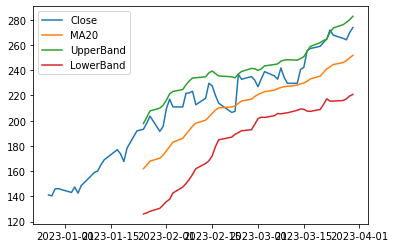

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock and time period
stock = 'NVDA'
start_date = '2022-12-27'
end_date = '2023-03-31'
# Retrieve the stock data from Yahoo Finance
data = yf.download(stock, start=start_date, end=end_date, group_by='ticker')

# Calculate the 20-day moving average and standard deviation
data['MA20'] = data['Close'].rolling(window=20).mean()
data['SD20'] = data['Close'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
data['UpperBand'] = data['MA20'] + (data['SD20'] * 2)
data['LowerBand'] = data['MA20'] - (data['SD20'] * 2)

# Plot the data and Bollinger Bands
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA20'], label='MA20')
plt.plot(data.index, data['UpperBand'], label='UpperBand')
plt.plot(data.index, data['LowerBand'], label='LowerBand')
plt.legend(loc='upper left')
plt.show()


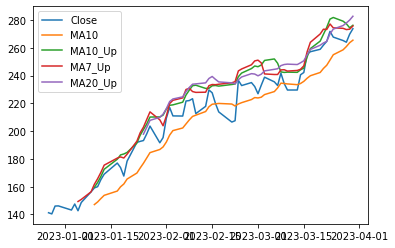

In [7]:
# Calculate the 10-day moving average and standard deviation
data['MA10'] = data['Close'].rolling(window=10).mean()
data['SD10'] = data['Close'].rolling(window=10).std()
data['MA7'] = data['Close'].rolling(window=7).mean()
data['SD7'] = data['Close'].rolling(window=7).std()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['SD20'] = data['Close'].rolling(window=20).std()
# Calculate the upper and lower Bollinger Bands
data['MA10_Up'] = data['MA10'] + (data['SD10'] * 2)
data['MA7_Up'] = data['MA7'] + (data['SD7'] * 2)
data['MA20_Up'] = data['MA20'] + (data['SD20'] * 2)


# Plot the data and Bollinger Bands
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA10'], label='MA10')
plt.plot(data.index, data['MA10_Up'], label='MA10_Up')
plt.plot(data.index, data['MA7_Up'], label='MA7_Up')
plt.plot(data.index, data['MA20_Up'], label='MA20_Up')

plt.legend(loc='upper left')
plt.show()
